Capstone Project on Predicting Credit Card Approvals


 ### Introduction
 Credit cards are one of the most commonly used financial tools. However, obtaining a credit card can be a difficult task for many individuals due to various factors such as income level, and employment status. To help streamline the application process and improve the approval rate, machine learning models can be used to predict credit card approval. In this project, we will explore how various factors affect credit card approval rates and use predictive models to improve the accuracy of credit card approval predictions.

1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

The proposal to predict credit card approval is highly relevant in today's world due to the increasing use of credit cards as a financial tool. With the rise in e-commerce and online transactions, credit cards have become a primary payment method for many individuals, making it essential for banks to efficiently process credit card applications and improve the approval rate. Predicting a good client is essential for a bank because it helps to minimize the risk of credit default and reduce the cost of managing credit card accounts. Banks can use machine learning algorithms to analyze various factors such as income level, employment status etc. By accurately predicting, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability and improved customer satisfaction.

2. How is it going to impact the banking sector?

predicting credit card approval using machine learning can have a transformative impact on the banking sector by improving the customer experience, reducing risk, and increasing profitability.

Improved customer experience: By using predictive models, banks can offer faster and more accurate credit card approvals, which can improve the overall customer experience. This can lead to increased customer satisfaction and loyalty.

Reduced risk of credit defaults: Machine learning algorithms can help banks to accurately predict the likelihood of a client defaulting on their credit card payments. By identifying clients with lower credit risk profiles, banks can offer credit cards with lower interest rates, which can reduce the risk of defaults and ultimately improve the bank's profitability.

Improved profitability: By reducing the risk of credit defaults and improving the efficiency of the underwriting process, banks can increase their profitability. This can help banks to offer better rates and benefits to their clients, leading to increased market share and revenue.


3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

If there is a gap in the knowledge or process used by a bank in India for credit card approval, the proposed method can be helpful for banks in India by improving the accuracy of credit card approval predictions, enhancing credit risk management strategies, and improving efficiency. However, to fully leverage the benefits of our proposed method, banks will need to ensure that they have access to reliable and comprehensive data sources.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading the data set
df=pd.read_csv("Credit_card.csv")


In [3]:
df1=pd.read_csv("Credit_card_label.csv")
#merging the data set
df2=pd.merge(df,df1,on="Ind_ID")


In [5]:
df2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
# renaming the column names
df2 = df2.rename(columns={'Ind_ID':'Ind_id', 'GENDER': 'Gender', 'CHILDREN': 'Children', 'EDUCATION': 'Education', 'EMAIL_ID':'Email_id','Birthday_count': 'Age','Employed_days':'Employed_exp'})


In [7]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [8]:
df2.describe()  #Finding the mean, min, max, and std deviation

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [9]:
# find out the null values
df2.isnull().sum()


Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [10]:
df2.info() #Display number of rows, columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_exp     1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

<Axes: >

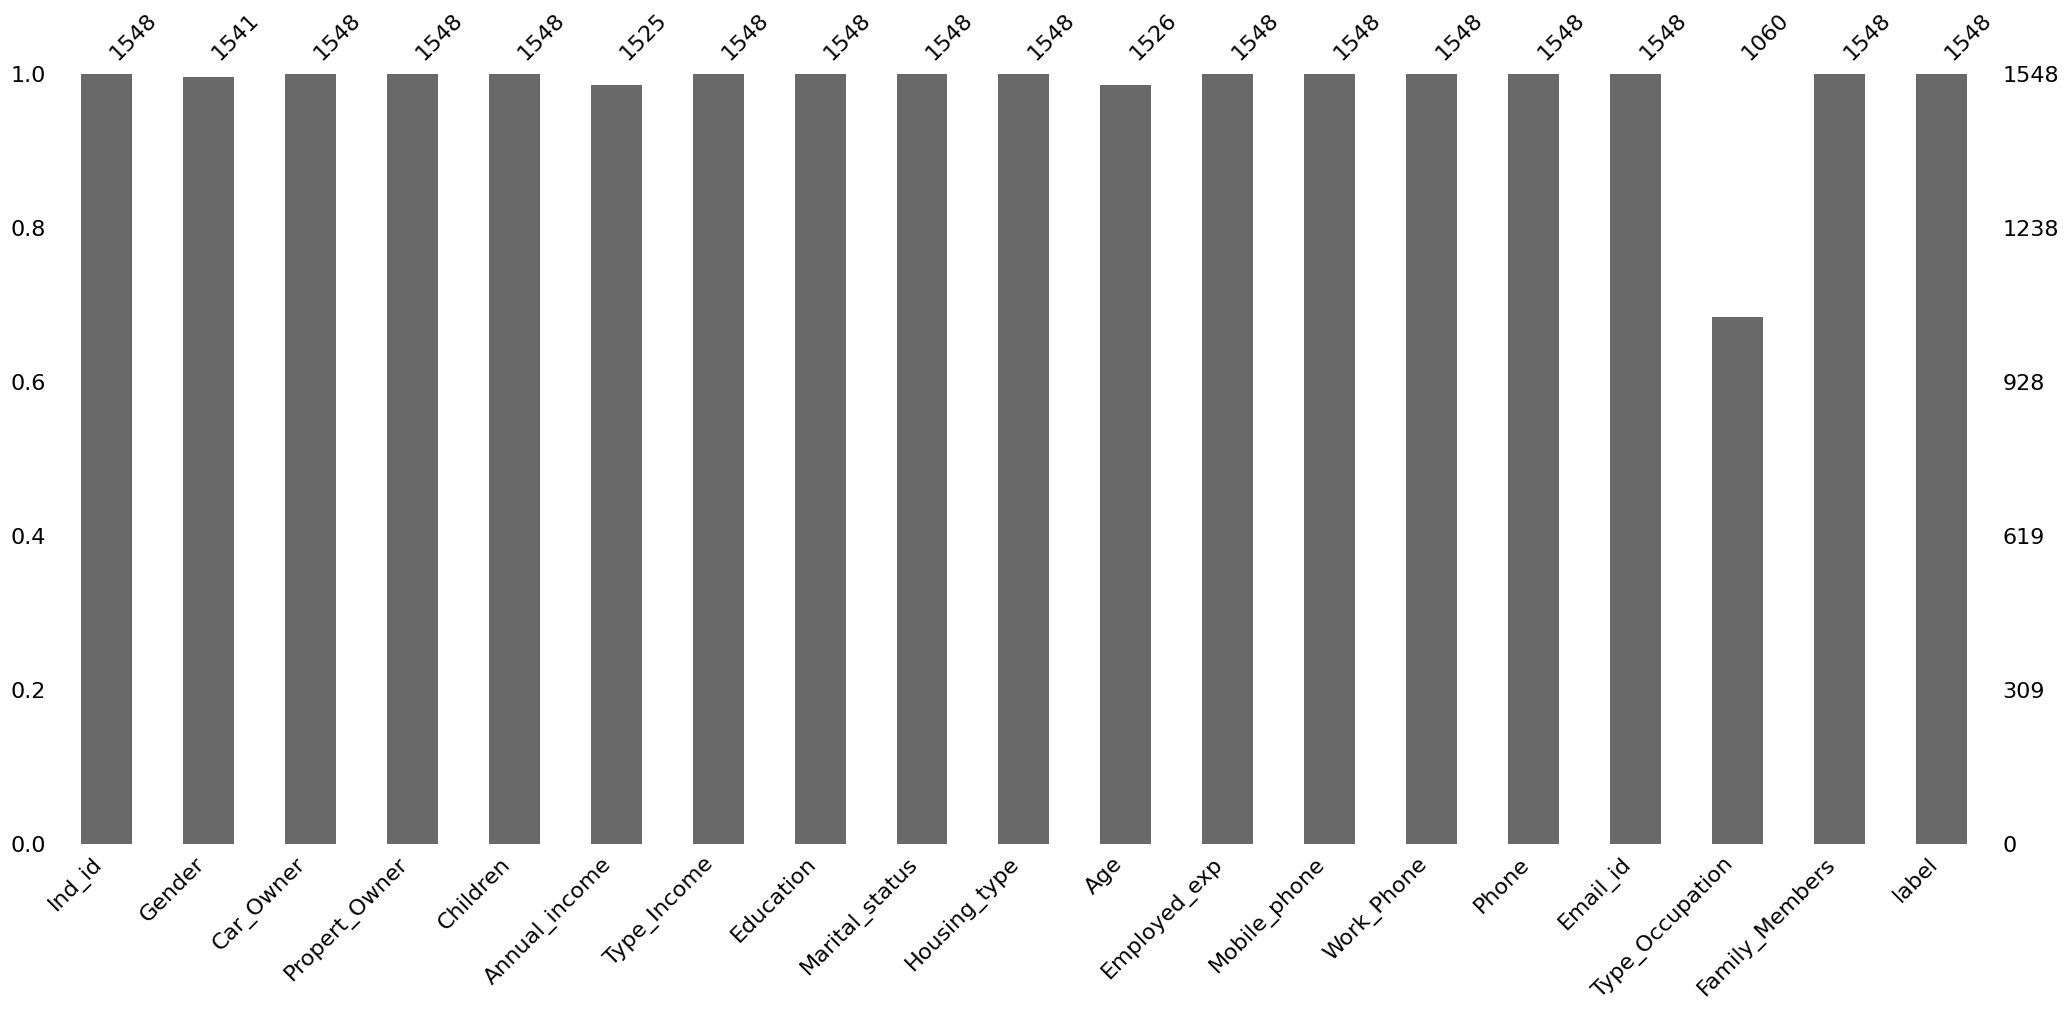

In [11]:
# exploratory the missing values
import missingno as msno
msno.bar(df2)

<Axes: >

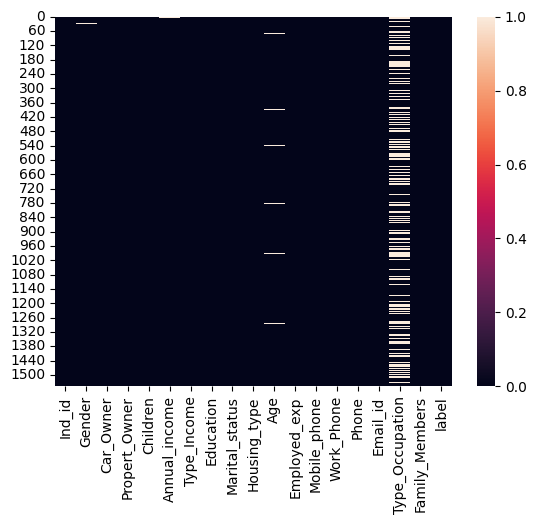

In [12]:
# visualising the missing values
sns.heatmap(df2.isnull())


In [13]:
# Imputing the null values with mean values
df2.fillna(df2.mean(), inplace=True)


In [14]:
# finding the null values.
df2.isnull().sum()


Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income        0
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                  0
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [15]:
# replace missing values
df2['Type_Occupation'].fillna('other',inplace=True)


In [16]:
# Deleting the null values in the Gender column
df2=df2.dropna(subset=["Gender"])


In [19]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1


In [20]:
# count the rows and columns
df2.shape


(1541, 19)

In [21]:
df2.columns

Index(['Ind_id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Age', 'Employed_exp', 'Mobile_phone', 'Work_Phone',
       'Phone', 'Email_id', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1541 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   Children         1541 non-null   int64  
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   Education        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Age              1541 non-null   float64
 11  Employed_exp     1541 non-null   int64  
 12  Mobile_phone     1541 non-null   int64  
 13  Work_Phone       1541 non-null   int64  
 14  Phone            1541 non-null   int64  
 15  Email_id         1541 non-null   int64  
 16  Type_Occupation  1541 non-null   object 
 17  Family_Members

In [23]:
# converting the negative values to actual age
df2['Age']=abs(round((df2['Age']/-365),0))
# converting negative values to exprience of the employee
df2['Employed_exp']=abs(round((df2['Employed_exp']/-365),0))


In [24]:
# replacing the extreme values with zero.
df2['Employed_exp'].replace(1001.0, 0,inplace=True)


In [25]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


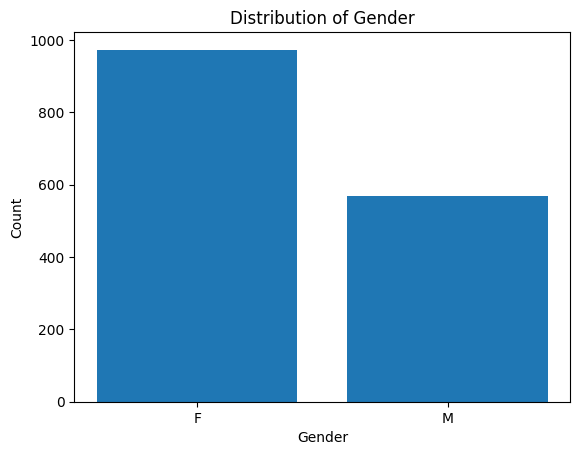

In [26]:
# count number of males and females
gender_count=df2['Gender'].value_counts()
#creat barpolt using Matplotlib
plt.bar(gender_count.index,gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


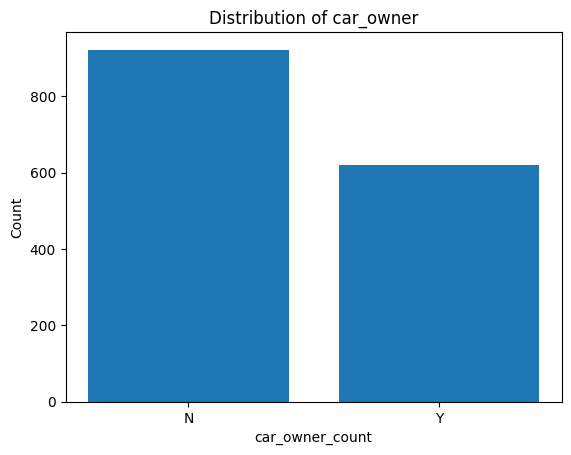

In [27]:
# count number of car owner
car_owner_count=df2['Car_Owner'].value_counts()
#creat barpolt using Matplotlib
plt.bar(car_owner_count.index,car_owner_count.values)
plt.xlabel('car_owner_count')
plt.ylabel('Count')
plt.title('Distribution of car_owner')
plt.show()


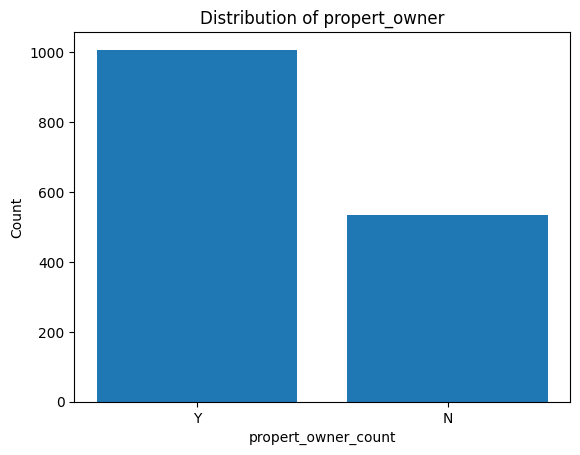

In [28]:
# count number of propert_owner
propert_owner_count=df2['Propert_Owner'].value_counts()
#creat barpolt using Matplotlib
plt.bar(propert_owner_count.index,propert_owner_count.values)
plt.xlabel('propert_owner_count')
plt.ylabel('Count')
plt.title('Distribution of propert_owner')
plt.show()


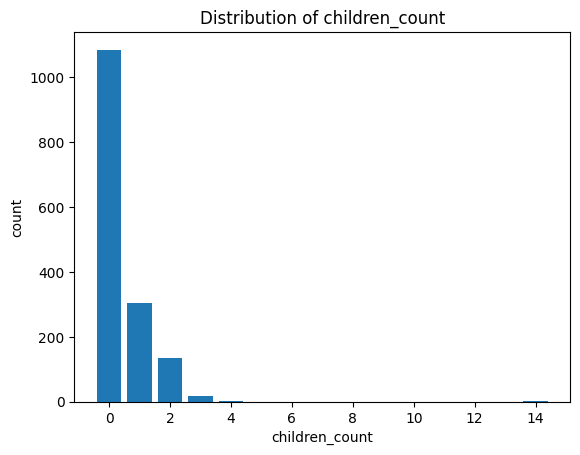

In [29]:
# count number of children
children_count=df2['Children'].value_counts()
#creat barpolt using Matplotlib
plt.bar(children_count.index,children_count.values)
plt.xlabel('children_count')
plt.ylabel('count')
plt.title('Distribution of children_count')
plt.show()


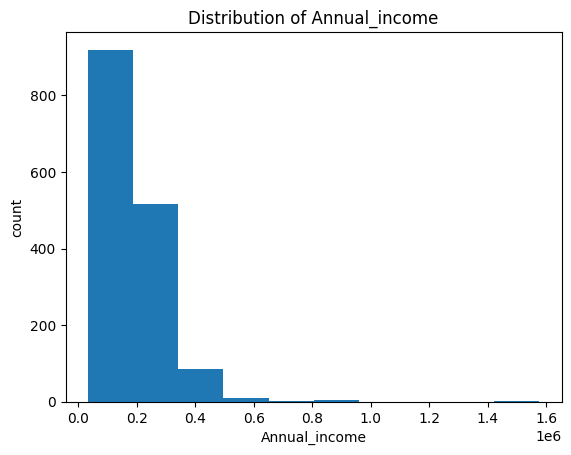

In [30]:
# histograph on Annual_income
plt.hist(df2['Annual_income'], bins=10)
plt.xlabel('Annual_income')
plt.ylabel('count')
plt.title('Distribution of Annual_income')
plt.show()


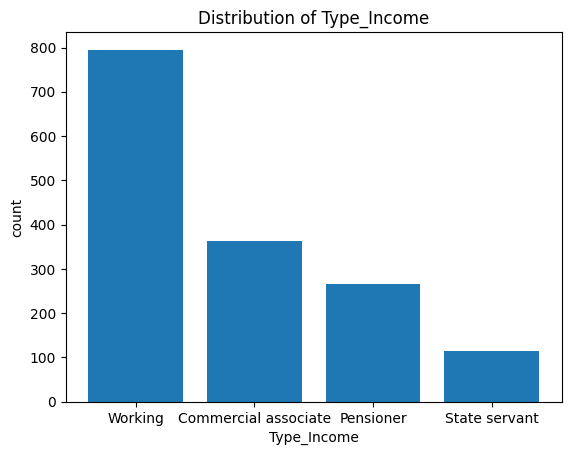

In [31]:
# count number of Type_Income
Type_Income_count=df2['Type_Income'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Type_Income_count.index,Type_Income_count.values)
plt.xlabel('Type_Income')
plt.ylabel('count')
plt.title('Distribution of Type_Income')
plt.show()


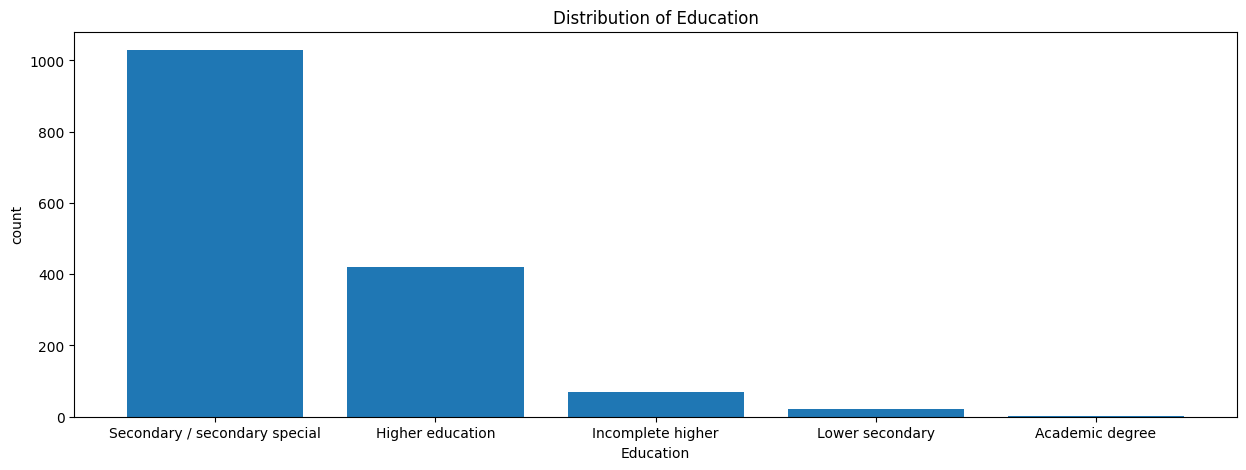

In [32]:
# count number of Education
Education_count=df2['Education'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Education_count.index,Education_count.values)
plt.xlabel('Education')
plt.ylabel('count')
plt.title('Distribution of Education')
plt.show()


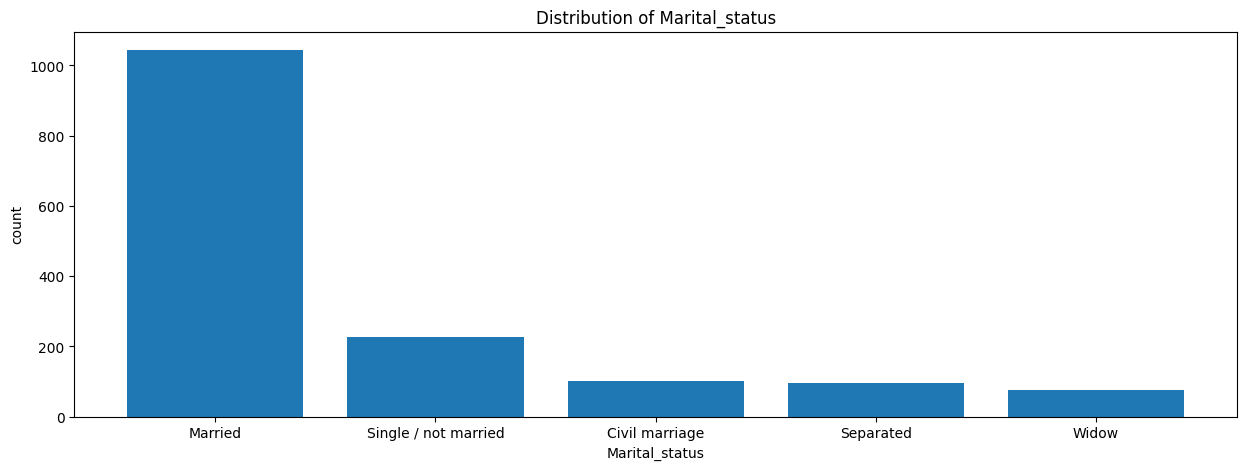

In [33]:
# count number of Marital_status
Marital_status_count=df2['Marital_status'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Marital_status_count.index,Marital_status_count.values)
plt.xlabel('Marital_status')
plt.ylabel('count')
plt.title('Distribution of Marital_status')
plt.show()


In [34]:
# count number of Marital_status
Marital_status_count=df2['Marital_status'].value_counts()


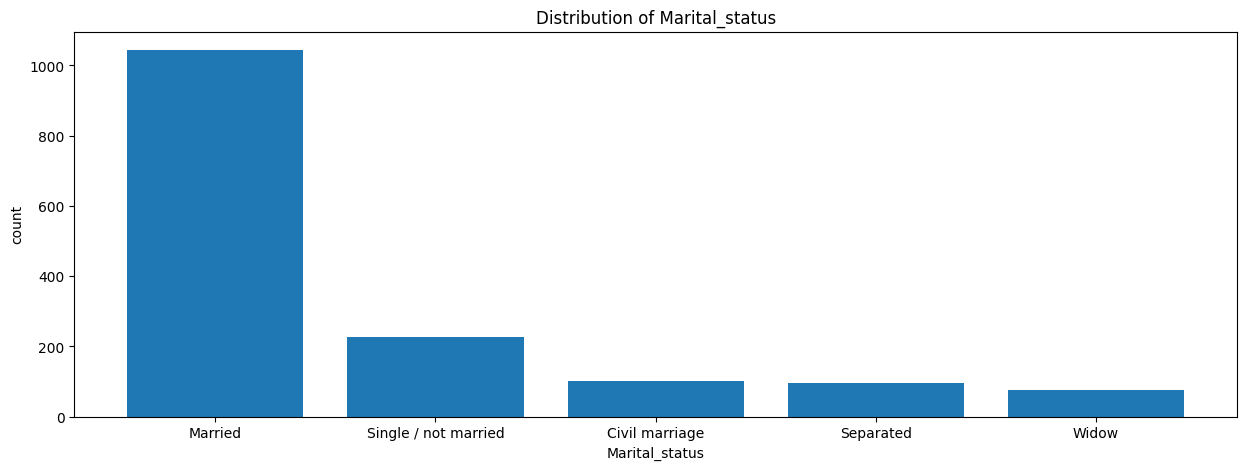

In [35]:
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Marital_status_count.index,Marital_status_count.values)
plt.xlabel('Marital_status')
plt.ylabel('count')
plt.title('Distribution of Marital_status')
plt.show()


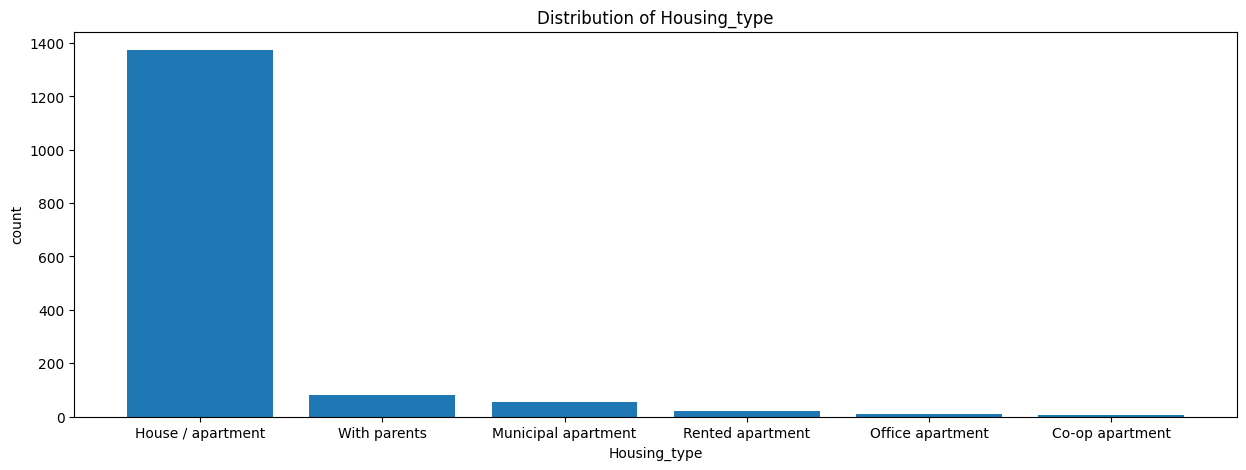

In [36]:
# count number of Housing_type
Housing_type_count=df2['Housing_type'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Housing_type_count.index,Housing_type_count.values)
plt.xlabel('Housing_type')
plt.ylabel('count')
plt.title('Distribution of Housing_type')
plt.show()


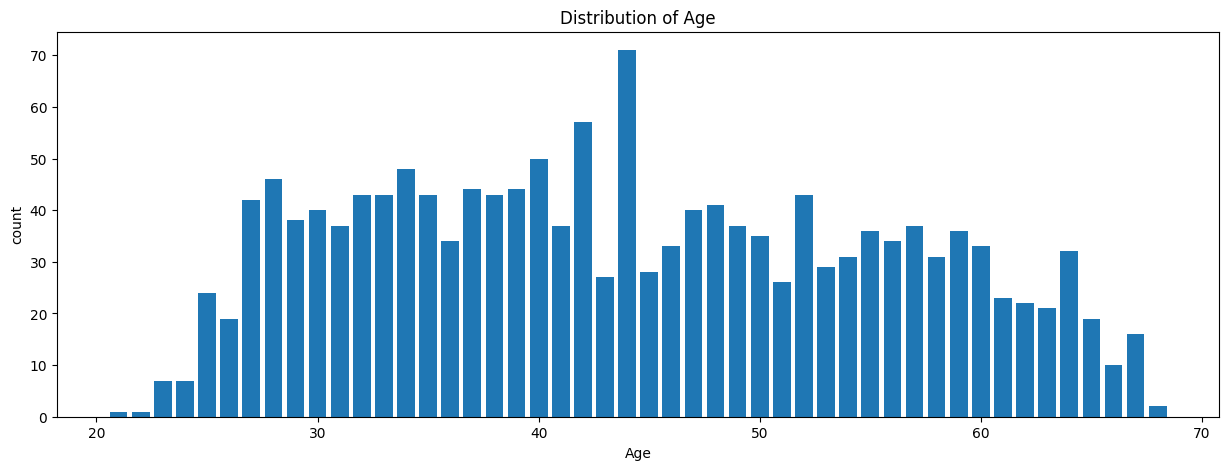

In [37]:
# count number of Birthday_count
Birthday_count=df2['Age'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Birthday_count.index,Birthday_count.values)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age')
plt.show()


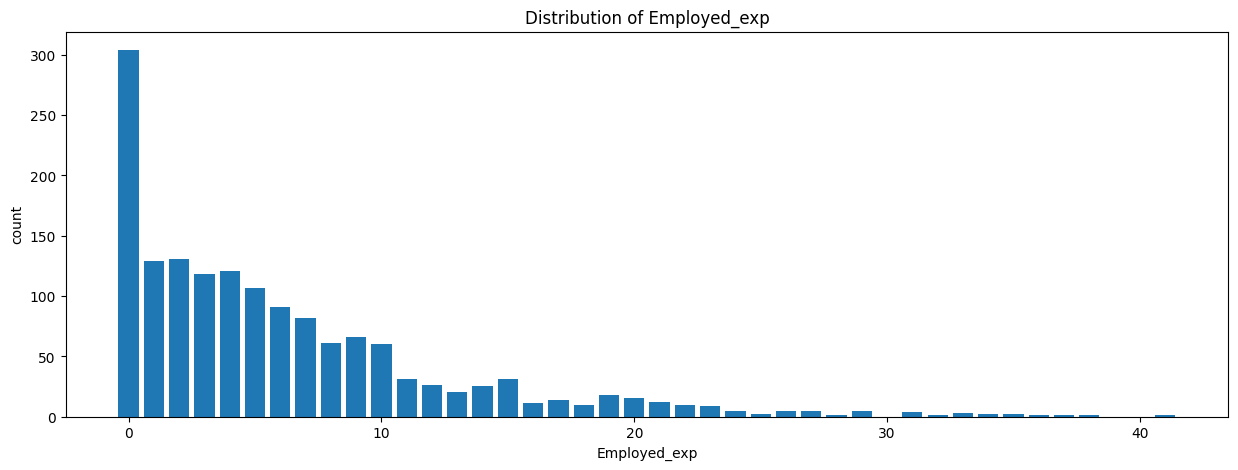

In [38]:
# count number of Employed_days
Employed_days_count=df2['Employed_exp'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Employed_days_count.index,Employed_days_count.values)
plt.xlabel('Employed_exp')
plt.ylabel('count')
plt.title('Distribution of Employed_exp')
plt.show()


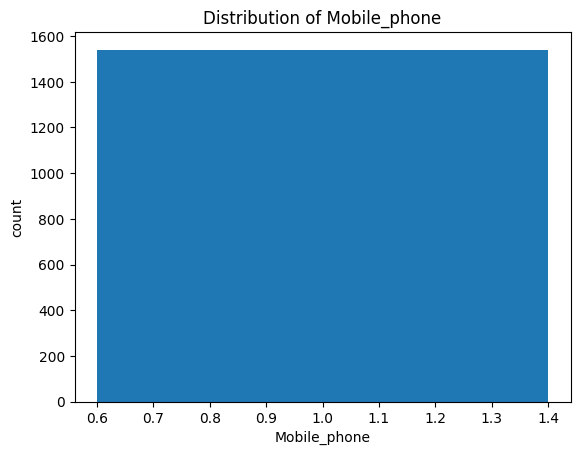

In [39]:
# count number of Mobile_phone
Mobile_phone_count=df2['Mobile_phone'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Mobile_phone_count.index,Mobile_phone_count.values)
plt.xlabel('Mobile_phone')
plt.ylabel('count')
plt.title('Distribution of Mobile_phone')
plt.show()


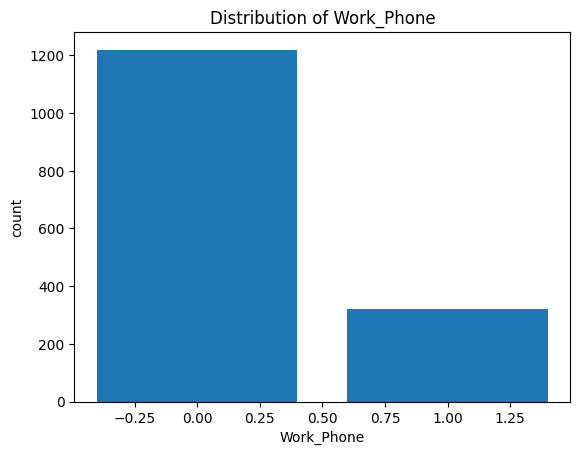

In [40]:
# count number of Work_Phone
Work_Phone_count=df2['Work_Phone'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Work_Phone_count.index,Work_Phone_count.values)
plt.xlabel('Work_Phone')
plt.ylabel('count')
plt.title('Distribution of Work_Phone')
plt.show()


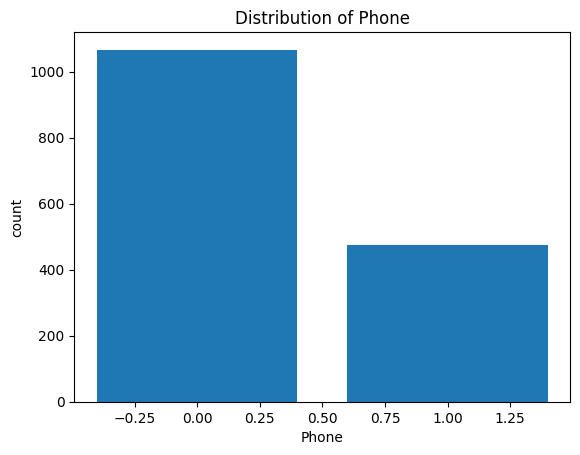

In [41]:
# count number of Phone
Phone_count=df2['Phone'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Phone_count.index,Phone_count.values)
plt.xlabel('Phone')
plt.ylabel('count')
plt.title('Distribution of Phone')
plt.show()


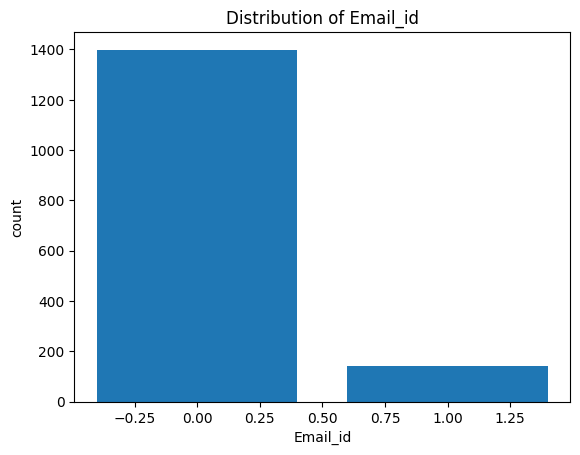

In [42]:
# count number of Email_id
Email_id_count=df2['Email_id'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Email_id_count.index,Email_id_count.values)
plt.xlabel('Email_id')
plt.ylabel('count')
plt.title('Distribution of Email_id')
plt.show()


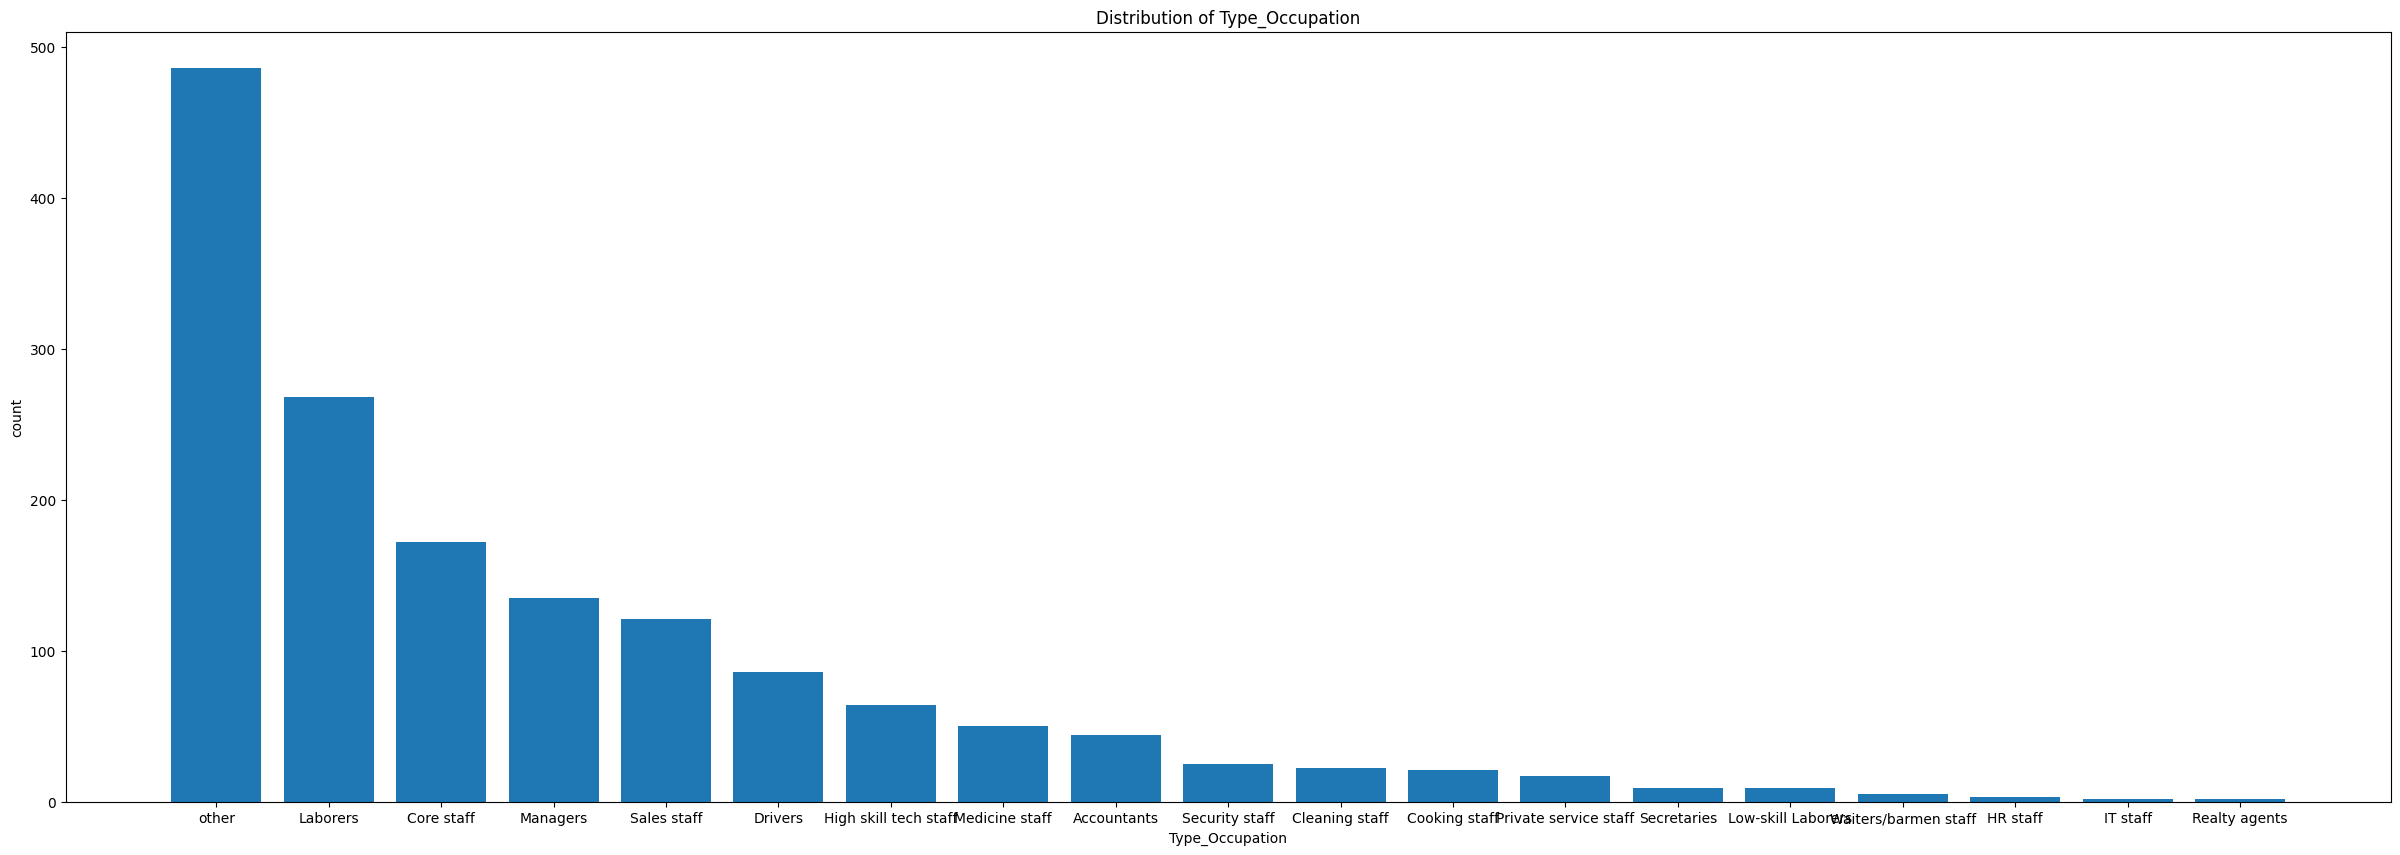

In [43]:
# count number of Type_Occupation
Type_Occupation_count=df2['Type_Occupation'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(30,10))
plt.bar(Type_Occupation_count.index,Type_Occupation_count.values)
plt.xlabel('Type_Occupation')
plt.ylabel('count')
plt.title('Distribution of Type_Occupation')
plt.show()


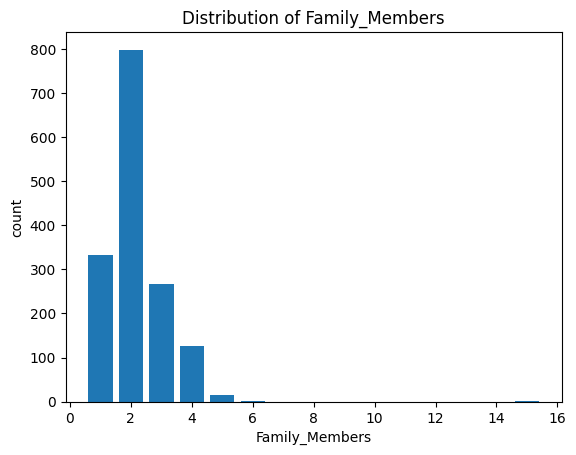

In [44]:
# count number of Family_Members
Family_Members_count=df2['Family_Members'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Family_Members_count.index,Family_Members_count.values)
plt.xlabel('Family_Members')
plt.ylabel('count')
plt.title('Distribution of Family_Members')
plt.show()


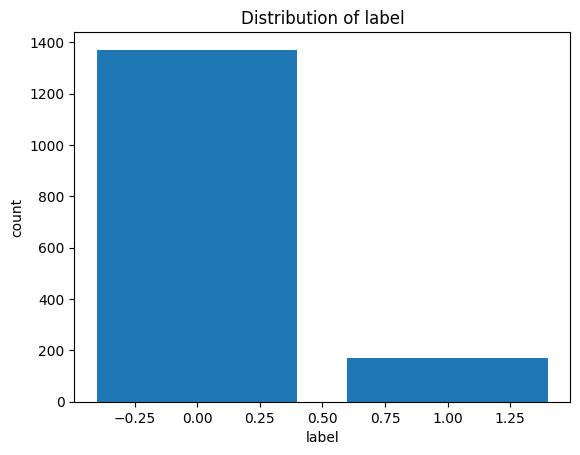

In [45]:
# count number of label
label_count=df2['label'].value_counts()
#creat barpolt using Matplotlib
plt.bar(label_count.index,label_count.values)
plt.xlabel('label')
plt.ylabel('count')
plt.title('Distribution of label')
plt.show()


In [46]:
df2.to_csv("final_project.csv")

In [47]:
df2.head(2)

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


#Relation between categorical variables

In [48]:
# Find out the correlation between variables using spearman rank correlation
df = df2.corr(method='spearman')
df


,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
Ind_id,1.000000,0.026155,-0.011117,-0.023564,0.025145,NaN,0.088004,0.007702,-0.044812,0.007507,0.016660
Children,0.026155,1.000000,0.064120,-0.336771,0.156326,NaN,0.040402,0.014571,0.055700,0.814514,-0.014037
Annual_income,-0.011117,0.064120,1.000000,-0.106760,0.165777,NaN,-0.069633,-0.020205,0.116949,0.039158,-0.000154
Age,-0.023564,-0.336771,-0.106760,1.000000,-0.195991,NaN,-0.164662,0.036688,-0.161943,-0.276376,0.048210
Employed_exp,0.025145,0.156326,0.165777,-0.195991,1.000000,NaN,0.159235,0.008315,-0.004001,0.182474,-0.100412
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.088004,0.040402,-0.069633,-0.164662,0.159235,NaN,1.000000,0.353164,-0.008726,0.086653,-0.007203
Phone,0.007702,0.014571,-0.020205,0.036688,0.008315,NaN,0.353164,1.000000,0.015692,0.019702,-0.001799
Email_id,-0.044812,0.055700,0.116949,-0.161943,-0.004001,NaN,-0.008726,0.015692,1.000000,0.054068,0.009560
Family_Members,0.007507,0.814514,0.039158,-0.276376,0.182474,NaN,0.086653,0.019702,0.054068,1.000000,-0.025891


<Axes: >

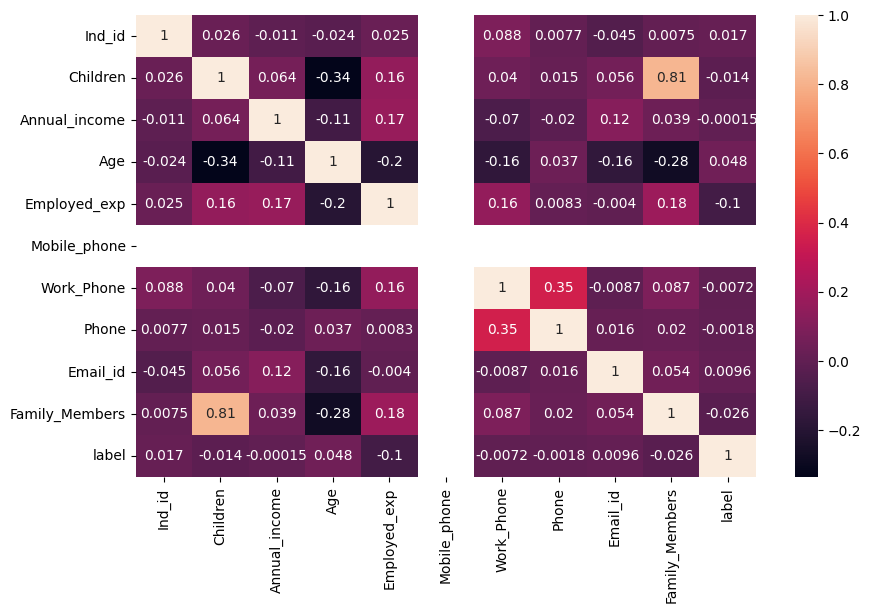

In [49]:
#Visualization of correlation using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df,annot=True)


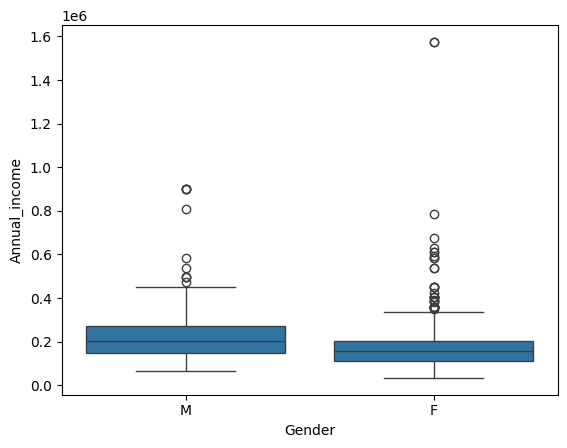

In [50]:
sns.boxplot(x ='Gender',y ="Annual_income",data=df2)
plt.show()


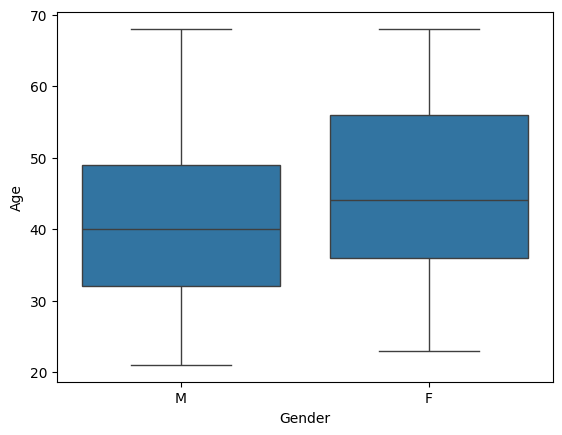

In [51]:
sns.boxplot(x ='Gender',y ="Age",data=df2)
plt.show()


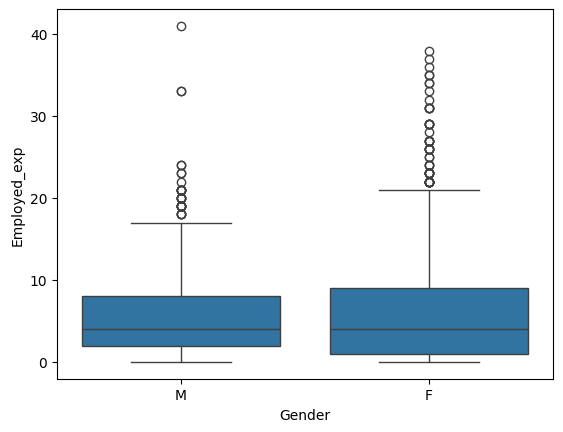

In [52]:
sns.boxplot(x ='Gender',y ="Employed_exp",data=df2)
plt.show()


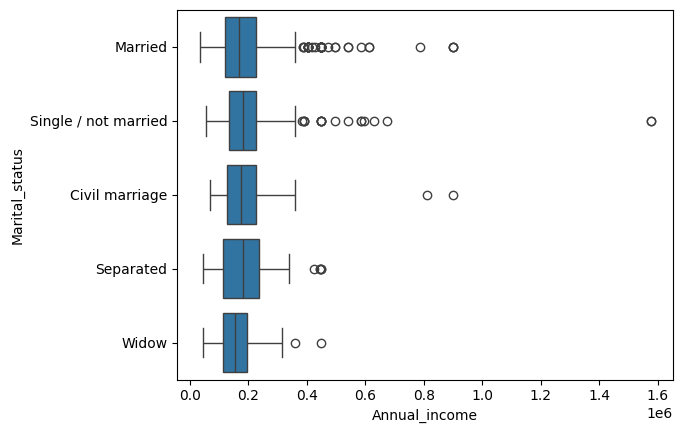

In [53]:
sns.boxplot(x ='Annual_income',y ="Marital_status",data=df2)
plt.show()


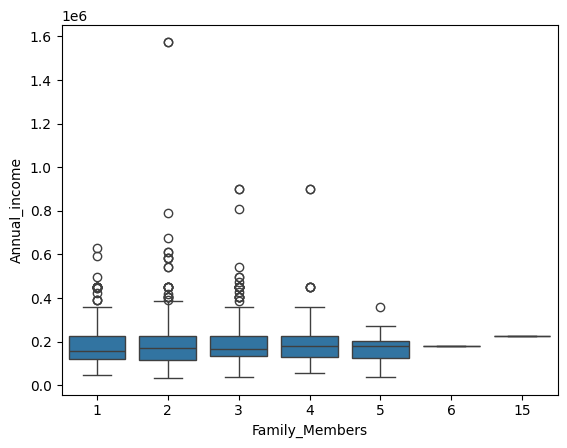

In [54]:
sns.boxplot(x ='Family_Members',y ="Annual_income",data=df2)
plt.show()


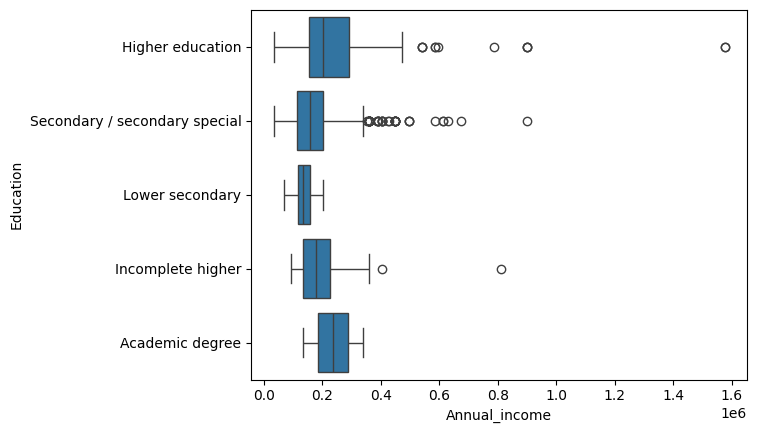

In [55]:
sns.boxplot(x ='Annual_income',y ="Education",data=df2)
plt.show()


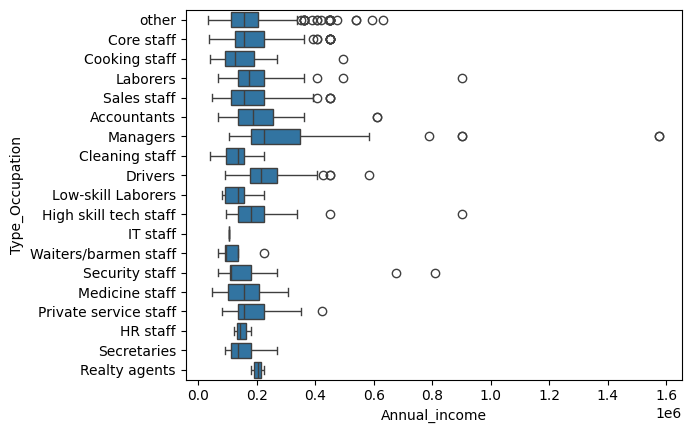

In [56]:
sns.boxplot(x ='Annual_income',y ="Type_Occupation",data=df2)
plt.show()


In [57]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


In [58]:
# removing unused columns
df2 = df2.drop(['Ind_id', 'Mobile_phone','Work_Phone','Phone','Email_id'], axis=1)


#Feature Engineering

In [59]:
# converting non numeric to numeric for train and test data
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df2:
  if df2[col].dtype=='object':
    df2[col]=le.fit_transform(df2[col])



In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1541 non-null   int64  
 1   Car_Owner        1541 non-null   int64  
 2   Propert_Owner    1541 non-null   int64  
 3   Children         1541 non-null   int64  
 4   Annual_income    1541 non-null   float64
 5   Type_Income      1541 non-null   int64  
 6   Education        1541 non-null   int64  
 7   Marital_status   1541 non-null   int64  
 8   Housing_type     1541 non-null   int64  
 9   Age              1541 non-null   float64
 10  Employed_exp     1541 non-null   float64
 11  Type_Occupation  1541 non-null   int64  
 12  Family_Members   1541 non-null   int64  
 13  label            1541 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 180.6 KB


In [61]:
df2.shape

(1541, 14)

#Model Building

In [62]:
# feature scaling
from sklearn.model_selection import train_test_split
# spliting the data
x = df2.iloc[:,0:-1]
y = df2.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)


In [63]:
# count the number rows and columns for x_test
x_test.shape


(463, 13)

In [64]:
# count the number rows and columns for x_train
x_train.shape


(1078, 13)

In [65]:
# count the number rows for y_test
y_test.shape


(463,)

In [66]:
# count the number rows for y_train
y_train.shape


(1078,)

#Scaling

In [67]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescale_x_train = scaler.fit_transform(x_train)
rescale_x_test = scaler.fit_transform(x_test)
print(rescale_x_train.shape)
print(rescale_x_test.shape)



(1078, 13)
(463, 13)


Applying ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable

#LogisticRegression

In [68]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(rescale_x_train, y_train)

LogisticRegression(random_state=0)

In [69]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logreg.predict(rescale_x_test)
print("logistic regression training set:",logreg.score(x_train, y_train))
print("logistic regression testing set:",logreg.score(x_test, y_test))
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))


logistic regression training set: 0.10946196660482375
logistic regression testing set: 0.11231101511879049
Accuracy of logistic regression classifier:  0.8876889848812095
[[411   0]
 [ 52   0]]


logistic regression training set: 0.10946196660482375
logistic regression testing set: 0.11231101511879049
Accuracy of logistic regression classifier:  0.8876889848812095
[[411   0]
 [ 52   0]]


#cross validation

In [70]:
#The cross-validation is done using the ShuffleSplit method
# cross validation
from sklearn.model_selection import ShuffleSplit
model= LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))



[0.89644013 0.88996764 0.87702265 0.90291262 0.90291262 0.89320388
 0.87702265 0.88673139 0.88673139 0.91262136]
0.8925566343042071


#Decision Tree

In [71]:
# decision tree classification  without rescaled
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(x_train,y_train)
y_pred = classification.predict(x_test)
print("decision tree training set:",classification.score(x_train, y_train))
print("decision tree testing set:",classification.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))


decision tree training set: 0.9944341372912802
decision tree testing set: 0.857451403887689
Accuracy: 0.857451403887689
[[377  34]
 [ 32  20]]


# cross validation

In [72]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))


[0.87378641 0.8381877  0.84142395 0.84142395 0.87378641 0.86084142
 0.90614887 0.8381877  0.8802589  0.87055016]
0.8624595469255665


#XG boost

In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
xg=XGBClassifier()
xg=xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print("xg training set:",xg.score(x_train, y_train))
print("xg testing set:",xg.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))


xg training set: 0.9935064935064936
xg testing set: 0.9092872570194385
Accuracy: 0.9092872570194385
[[401  10]
 [ 32  20]]


#cross validation

In [74]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=XGBClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))


[0.89644013 0.91585761 0.90614887 0.90938511 0.90291262 0.89320388
 0.90938511 0.9223301  0.91585761 0.90938511]
0.9080906148867316


#Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("rf training set:",rf.score(x_train, y_train))
print("rf testing set:",rf.score(x_test, y_test))
print("Random Forest classifier has accuracy of: ", rf.score(x_test, y_test))
# Evaluate the confusion_matrix
print(confusion_matrix(y_test, y_pred))


rf training set: 0.9944341372912802
rf testing set: 0.9222462203023758
Random Forest classifier has accuracy of:  0.9222462203023758
[[408   3]
 [ 33  19]]


#cross validation

In [76]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))


[0.91585761 0.91262136 0.93851133 0.91585761 0.93203883 0.94822006
 0.93203883 0.90938511 0.92556634 0.93851133]
0.9268608414239482


# conclusion

Hence i got accuracy on different classification

logisitic regression got accuracy 88%

DecisionTree got accuracy 85%

xg boosting got accuracy 90%

Random Forest got accuracy 92%

i have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.
After feature selection we used four machine learning models and achieved quite good accuracy 92% in Random Forest for predicting the credit card approval.


-------------------------------------------------------------- Thank you ------------------------------------------------------